In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
import numpy as np
# from ydata_profiling import ProfileReport

In [2]:
columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', \
         'acceleration', 'model_year', 'origin', 'car_name']

auto_mpg_df = pd.read_csv('auto_mpg/auto-mpg.data', delim_whitespace=True, names=columns)
auto_mpg_df.drop(columns=['car_name'], inplace=True)

#Converting the column from object to float, coercing the error due to the presence of '?' in the column
auto_mpg_df['horsepower'] = pd.to_numeric(auto_mpg_df['horsepower'], errors='coerce')

# Using forward fill to replace NaN values
auto_mpg_df['horsepower'] = auto_mpg_df["horsepower"].fillna(method='ffill')


scaler = StandardScaler()
auto_mpg_df[auto_mpg_df.columns] = scaler.fit_transform(auto_mpg_df[auto_mpg_df.columns])

In [122]:
# Checking NaN values
auto_mpg_df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [102]:
auto_mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,-0.706439,1.498191,1.090604,0.675133,0.630870,-1.295498,-1.627426,-0.715145
1,-1.090751,1.498191,1.503514,1.590245,0.854333,-1.477038,-1.627426,-0.715145
2,-0.706439,1.498191,1.196232,1.198054,0.550470,-1.658577,-1.627426,-0.715145
3,-0.962647,1.498191,1.061796,1.198054,0.546923,-1.295498,-1.627426,-0.715145
4,-0.834543,1.498191,1.042591,0.936593,0.565841,-1.840117,-1.627426,-0.715145


In [103]:
auto_mpg_df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02
mean,7.141133e-17,-3.570567e-17,-1.785283e-17,-1.071170e-16,-1.606755e-16,-2.677925e-16,-1.642461e-15,-5.355850e-17
std,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00
min,-1.859374e+00,-1.444949e+00,-1.204411e+00,-1.521135e+00,-1.604943e+00,-2.747814e+00,-1.627426e+00,-7.151448e-01
25%,-7.704907e-01,-8.563206e-01,-8.563178e-01,-7.628996e-01,-8.828266e-01,-6.328794e-01,-8.150739e-01,-7.151448e-01
50%,-6.591883e-02,-8.563206e-01,-4.314040e-01,-3.053438e-01,-1.973624e-01,-2.472221e-02,-2.721449e-03,-7.151448e-01
75%,7.027050e-01,1.498191e+00,6.584879e-01,5.444028e-01,7.538337e-01,5.834349e-01,8.096310e-01,5.332220e-01
max,2.957335e+00,1.498191e+00,2.511784e+00,3.289738e+00,2.565185e+00,3.351912e+00,1.621983e+00,1.781589e+00


## Quantile Analysis

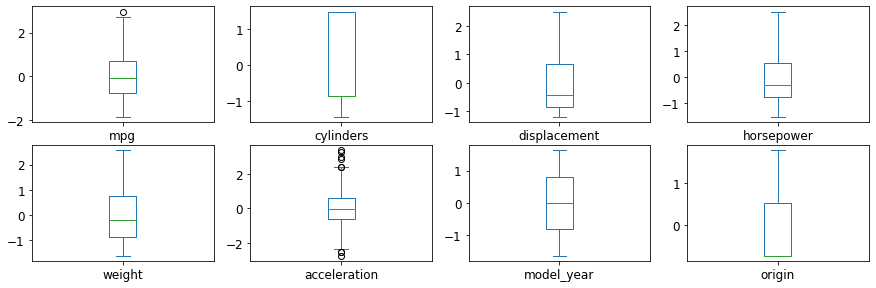

In [5]:
auto_mpg_df.plot(kind='box', subplots=True, layout=(8,4), sharex=False, sharey=False, fontsize=12, figsize=(15,20))
plt.show()

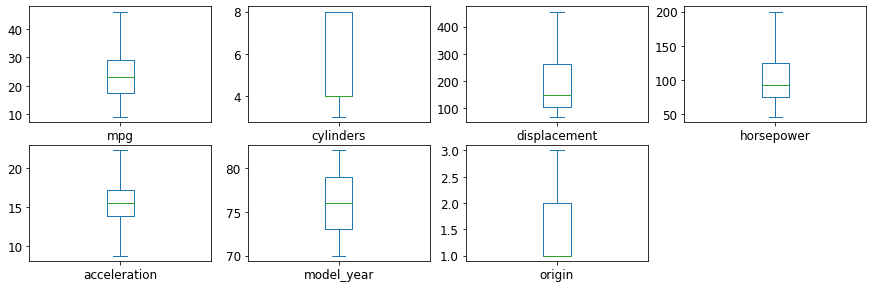

In [7]:
auto_mpg_df.plot(kind='box', subplots=True, layout=(8,4), sharex=False, sharey=False, fontsize=12, figsize=(15,20))
plt.show()

<Axes: >

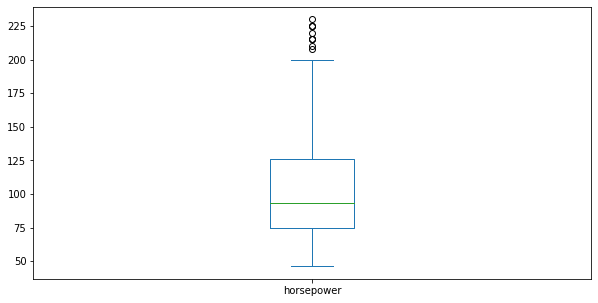

In [160]:
auto_mpg_df['horsepower'].plot(kind='box', figsize=(10, 5))

In [51]:
acc_series = auto_mpg_df['acceleration']
quant_25 = np.quantile(acc_series, 0.25)
quant_75 = np.quantile(acc_series, 0.75)

lower_outlier_gate = quant_25 - ((1.5) * (quant_75 - quant_25))
upper_outlier_gate = quant_75 + ((1.5) * (quant_75 - quant_25))

print('Acceleration IQR info')
print(f'Lower Gate : {lower_outlier_gate}')
print(f'Upper Gate : {upper_outlier_gate}')

Acceleration IQR info
Lower Gate : -2.4573508133408954
Upper Gate : 2.407906400791956


In [57]:
auto_mpg_df['acceleration'][auto_mpg_df['acceleration'] > upper_outlier_gate]

59     2.879909
195    2.407906
299    3.351912
300    2.407906
326    2.952525
394    3.279296
Name: acceleration, dtype: float64

In [56]:
auto_mpg_df['acceleration'][auto_mpg_df['acceleration'] < lower_outlier_gate]

7    -2.566274
9    -2.566274
11   -2.747814
Name: acceleration, dtype: float64

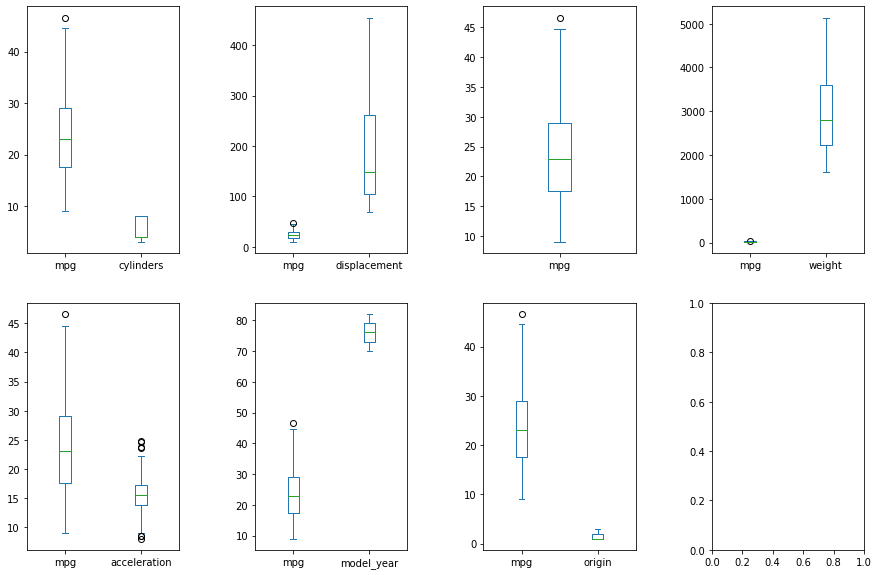

In [107]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15,10))
fig.subplots_adjust(hspace =.2, wspace=.5)

axes = axes.ravel()
for i, col in enumerate(auto_mpg_df.columns[1:]):
    auto_mpg_df[['mpg', col]].plot(kind='box', ax=axes[i])

In [5]:

def get_outlier_info(series):
    
    quant_25 = np.quantile(series, 0.25)
    quant_75 = np.quantile(series, 0.75)

    lower_outlier_gate = quant_25 - ((1.5) * (quant_75 - quant_25))
    upper_outlier_gate = quant_75 + ((1.5) * (quant_75 - quant_25))

    
    return lower_outlier_gate, upper_outlier_gate


def get_outlier_val_counts(series, lower_outlier_gate, upper_outlier_gate):
    
    lower_outliers = series[series < lower_outlier_gate]
    upper_outliers = series[series > upper_outlier_gate]

    return {lower_outlier_gate : [len(lower_outliers), lower_outliers], upper_outlier_gate : [len(upper_outliers), upper_outliers]}

def clean_outliers(df, col_name, lower_cutoff_thresh, upper_cutoff_thresh):
    
    df.loc[df[col_name] > upper_cutoff_thresh, col_name] = upper_cutoff_thresh
    df.loc[df[col_name] < lower_cutoff_thresh, col_name] = lower_cutoff_thresh
    
    return df
    
    

    

## Cleaning the outliers by replacing the outlier values with the Upper gate of the quantile plot

In [8]:
# Cleaning the outliers by replacing the outlier values with the Upper gate of the quantile plot
val_dict_list = []

for col in auto_mpg_df.columns:
    
    lower_outlier_gate, upper_outlier_gate = get_outlier_info(auto_mpg_df[col])
    auto_mpg_df = clean_outliers(auto_mpg_df, col, lower_outlier_gate, upper_outlier_gate)
    
    #Sanity Check
    val_dict = get_outlier_val_counts(auto_mpg_df[col], lower_outlier_gate, upper_outlier_gate)
    val_dict_list.append(val_dict)
    

            
print(val_dict_list)

## Correlation Analysis

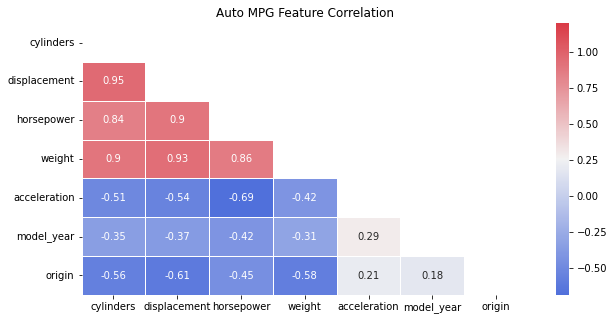

In [223]:
corrMatt = auto_mpg_df.drop(columns=['mpg']).corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corrMatt)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(10,5))
plt.title('Auto MPG Feature Correlation')
# Generate a custom diverging colormap
cmap = sns.diverging_palette(260, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corrMatt, vmax=1.2, square=False, cmap=cmap, mask=mask,
ax=ax, annot=True, fmt='.2g', linewidths=1);

<hr>
<hr>


# Model Training - Dry Run


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import seaborn as sns
import scipy
from scipy.stats import pearsonr
import sklearn
from sklearn import datasets, linear_model
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

import pickle
from datetime import datetime

In [33]:
def save_model(model, save_path='auto_mpg/models/', name=""):
    time_stamp = datetime.now().strftime("%d-%b-%Y-%H-%M-%S")
    save_file_name = f'{save_path}{time_stamp}-{name}.pickle'
    with open(save_file_name, 'wb') as f:
        pickle.dump(clf, f)
        print(f'Saved in {save_file_name}')

## Read and pre-process the data

In [3]:
columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', \
         'acceleration', 'model_year', 'origin', 'car_name']

auto_mpg_df = pd.read_csv('auto_mpg/auto-mpg.data', delim_whitespace=True, names=columns)
auto_mpg_df.drop(columns=['car_name'], inplace=True)
# auto_mpg_df.drop(columns=['car_name', 'weight'], inplace=True)

#Converting the column from object to float, coercing the error due to the presence of '?' in the column
auto_mpg_df['horsepower'] = pd.to_numeric(auto_mpg_df['horsepower'], errors='coerce')

# Using forward fill to replace NaN values
auto_mpg_df['horsepower'] = auto_mpg_df["horsepower"].fillna(method='ffill')

In [6]:
# Cleaning the outliers by replacing the outlier values with the Upper gate of the quantile plot
val_dict_list = []

for col in auto_mpg_df.columns:
    
    lower_outlier_gate, upper_outlier_gate = get_outlier_info(auto_mpg_df[col])
    auto_mpg_df = clean_outliers(auto_mpg_df, col, lower_outlier_gate, upper_outlier_gate)
    
    #Sanity Check
    val_dict = get_outlier_val_counts(auto_mpg_df[col], lower_outlier_gate, upper_outlier_gate)
    val_dict_list.append(val_dict)
    

            
print(val_dict_list)

[{0.25: [0, Series([], Name: mpg, dtype: float64)], 46.25: [0, Series([], Name: mpg, dtype: float64)]}, {-2.0: [0, Series([], Name: cylinders, dtype: int64)], 14.0: [0, Series([], Name: cylinders, dtype: int64)]}, {-132.375: [0, Series([], Name: displacement, dtype: float64)], 498.625: [0, Series([], Name: displacement, dtype: float64)]}, {0.0: [0, Series([], Name: horsepower, dtype: float64)], 200.0: [0, Series([], Name: horsepower, dtype: float64)]}, {147.375: [0, Series([], Name: weight, dtype: float64)], 5684.375: [0, Series([], Name: weight, dtype: float64)]}, {8.8: [0, Series([], Name: acceleration, dtype: float64)], 22.2: [0, Series([], Name: acceleration, dtype: float64)]}, {64.0: [0, Series([], Name: model_year, dtype: int64)], 88.0: [0, Series([], Name: model_year, dtype: int64)]}, {-0.5: [0, Series([], Name: origin, dtype: float64)], 3.5: [0, Series([], Name: origin, dtype: float64)]}]


## Split the data

In [7]:
def train_val_test_split(Xy, train_ratio=0.7, only_test=False):
    
    np.random.shuffle(Xy)
    total_count = Xy.shape[0]
    train_count = int(train_ratio * total_count)
    val_count = int((total_count - train_count)/2)
    test_count = total_count - (train_count + val_count)
    
    return Xy[:train_count], Xy[train_count:train_count+val_count], Xy[train_count+val_count:]

In [8]:
auto_mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1.0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1.0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1.0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1.0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1.0


In [9]:
c_numpy = auto_mpg_df.to_numpy()
train, val, test = train_val_test_split(c_numpy)
train.shape, val.shape, test.shape

((278, 8), (60, 8), (60, 8))

In [10]:
scalerTrainX = StandardScaler()
scalerTrainY = StandardScaler()

trainX = scalerTrainX.fit_transform(train[:, 1:])
trainY = scalerTrainY.fit_transform(train[:, 0].reshape(-1, 1))

valX = scalerTrainX.transform(val[:, 1:])
valY = scalerTrainY.transform(val[:, 0].reshape(-1, 1))

testX = scalerTrainX.transform(test[:, 1:])
testY = scalerTrainY.transform(test[:, 0].reshape(-1, 1))

In [11]:
train.shape, train[:, 1:].shape, train[:, 0].shape

((278, 8), (278, 7), (278,))

In [12]:
index=5

print(f'Train Mean : {np.average(trainX[:,index]):.20f}', f'Train std : {np.std(trainX[:,index]):.20f}')
print(f'Val Mean : {np.average(valX[:,index]):.20f}', f'Val std: {np.std(valX[:,index]):.20f}')
print(f'Test Mean : {np.average(testX[:,index]):.20f}', f'Test std: {np.std(testX[:,index]):.20f}')

print(f'TrainY Mean : {np.average(trainY[:,0]):.20f}', f'TrainY std : {np.std(trainY[:,0]):.20f}')

Train Mean : 0.00000000000000101597 Train std : 1.00000000000000000000
Val Mean : -0.11064284055921556893 Val std: 0.91118704773321090862
Test Mean : -0.19097609275862356681 Test std: 0.99410834293178829135
TrainY Mean : 0.00000000000000000639 TrainY std : 1.00000000000000000000


# Decision Tree

In [13]:
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV

In [26]:
# criterion='absolute_error', 'squared_error'
clf = tree.DecisionTreeRegressor(criterion='absolute_error', min_samples_leaf=2, min_samples_split=10, max_depth=50)
clf = clf.fit(trainX, trainY)
predicted = clf.predict(testX)
test_mse_error = mean_squared_error(predicted, testY)
test_mae_error = mean_absolute_error(predicted, testY)
test_r2_error = r2_score(predicted, testY)

print(f'MSE error: {test_mse_error}')
print(f'MAE error: {test_mae_error}')
print(f'R2 error: {test_r2_error}')

MSE error: 0.18492577633315585
MAE error: 0.28253262855621525
R2 error: 0.8076725478608049


In [25]:
# save_model(clf, name='decision_tree')

## Grid Search for Hyperparameters


In [27]:
# criterion = ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']
criterion = ['squared_error', 'absolute_error']
max_depth = [10, 20, 30, 45, 50, 55, 60]
min_samples_split  = [5, 6, 7, 8, 9, 10, 11, 12, 13]
min_samples_leaf = [2, 3, 4, 5,6,7,8,9,]
max_features = [3, 5, 6]

parameters = dict(criterion=criterion, max_depth=max_depth, min_samples_split=min_samples_split,
                  min_samples_leaf=min_samples_leaf, max_features=max_features)

In [28]:
clf = tree.DecisionTreeRegressor(random_state=1)
clf_GS = GridSearchCV(clf, parameters)
clf_GS.fit(trainX, trainY)

print('Best Criterion:', clf_GS.best_estimator_.get_params()['criterion'])
print('Best max_depth:', clf_GS.best_estimator_.get_params()['max_depth'])
print('Best Number Of min_samples_leaf:', clf_GS.best_estimator_.get_params()['min_samples_leaf'])
print('Best Number Of min_samples_split:', clf_GS.best_estimator_.get_params()['min_samples_split'])


Best Criterion: squared_error
Best max_depth: 10
Best Number Of min_samples_leaf: 9
Best Number Of min_samples_split: 5


In [29]:
clf_GS.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 10,
 'max_features': 5,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 9,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 1,
 'splitter': 'best'}

In [31]:
clf = tree.DecisionTreeRegressor(**clf_GS.best_estimator_.get_params())
clf = clf.fit(trainX, trainY)
predicted = clf.predict(testX)
test_mse_error = mean_squared_error(predicted, testY)
test_mae_error = mean_absolute_error(predicted, testY)
test_r2_error = r2_score(predicted, testY)


print(f'MSE error: {test_mse_error}')
print(f'MAE error: {test_mae_error}')
print(f'R2 error: {test_r2_error}')


MSE error: 0.15916929037080138
MAE error: 0.27491656534956815
R2 error: 0.8233031813826815


In [67]:
predicted = clf.predict(testX)
test_mse_error = mean_squared_error(predicted, testY)
test_mae_error = mean_absolute_error(predicted, testY)
test_r2_error = r2_score(predicted, testY)

print(f'MSE error: {test_mse_error}')
print(f'MAE error: {test_mae_error}')
print(f'R2 error: {test_r2_error}')

MSE error: 0.15916929037080138
MAE error: 0.27491656534956815
R2 error: 0.8233031813826815


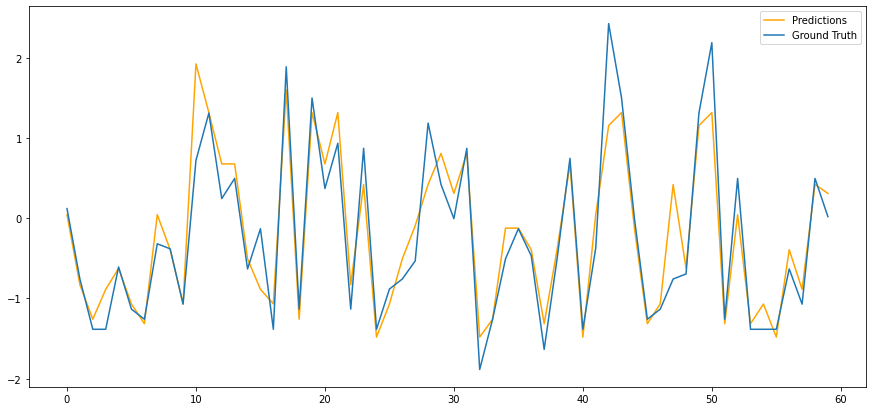

In [68]:
plt.figure(figsize=(15,7))
plt.plot(list(range(len(predicted))), predicted, color='orange', label='Predictions')
plt.plot(list(range(len(predicted))), testY.flatten(), label='Ground Truth')
plt.legend();
plt.show()

In [34]:
save_model(clf, name='decision_tree')

Saved in auto_mpg/models/06-Nov-2023-14-38-58-decision_tree.pickle


In [81]:
clf = tree.DecisionTreeRegressor(criterion='squared_error', min_samples_leaf=2, min_samples_split=10,
                                 max_depth=50)
clf = clf.fit(trainX, trainY)
predicted = clf.predict(testX)
test_mse_error = mean_squared_error(predicted, testY)
test_mae_error = mean_absolute_error(predicted, testY)

print(f'MSE error: {test_mse_error}')
print(f'MAE error: {test_mae_error}')

MSE error: 0.1961491034374352
MAE error: 0.2974272389634919


In [128]:
def comparison_plot(pred, GT, figsize=(10,10)):
    plt.rcParams['legend.numpoints'] = 1

    #generate some random data
    # pred = predicted
    # GT =  testY.flatten()

    fig, ax = plt.subplots(figsize=(10,10))

    # plot a black line between the 
    # ith prediction and the ith ground truth 
    for i in range(len(pred)):
        ax.plot([i,i],[pred[i], GT[i]], c="k", linewidth=0.5)
    ax.plot(pred,'o', label='Prediction', color = 'g')
    ax.plot(GT,'^', label='Ground Truth', color = 'r' )

    ax.set_xlim((-1,60))
    plt.xlabel('Instances')
    plt.ylabel('Predictions')
    plt.title('Prediction - Ground Truth Comparison')

    plt.legend()             
    plt.show()
    

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(list(range(len(predicted))), predicted, color='orange', label='Predictions')
plt.plot(list(range(len(predicted))), testY.flatten(), label='Ground Truth')
plt.legend();
plt.show()

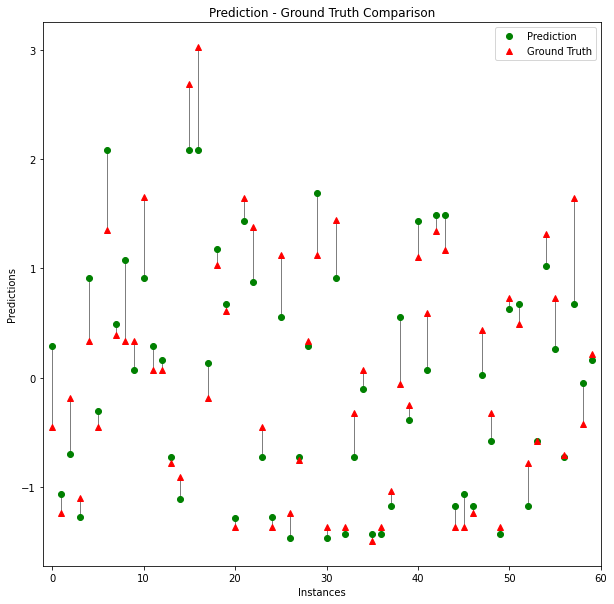

In [150]:
comparison_plot(predicted, testY.flatten())

## Cross validation

In [36]:
def perform_dt_cv(Xdata, Ydata, params:dict=None, cv_no:int=10, scoring=None):
    
    if params is None:
        clf = tree.DecisionTreeRegressor()
    else:
        clf = tree.DecisionTreeRegressor(**params)
        
    if scoring is None:
        scoring='neg_mean_squared_error'
        
        
    cv_scores = cross_val_score(clf, Xdata, Ydata, cv=cv_no, scoring=scoring)
    print(f'CV Scores : {cv_scores}')
    
    print(f'Mean CV Scores : {np.average(cv_scores)}')
    

In [37]:
perform_dt_cv(Xdata=trainX, Ydata=trainY,
              params=clf_GS.best_estimator_.get_params(), cv_no=10,
              scoring=make_scorer(mean_squared_error))

CV Scores : [0.12081511 0.18339939 0.15427095 0.05739827 0.1476284  0.11417596
 0.08863869 0.26109718 0.10184375 0.2198936 ]
Mean CV Scores : 0.14491613046167617


In [45]:
perform_dt_cv(Xdata=trainX, Ydata=trainY,
              params=clf_GS.best_estimator_.get_params(), cv_no=10,
              scoring=make_scorer(mean_absolute_error))

CV Scores : [0.25637753 0.32540103 0.27798036 0.19475551 0.29308291 0.23331565
 0.20447758 0.33463499 0.24046157 0.34855698]
Mean CV Scores : 0.27090441096737944


In [46]:
perform_dt_cv(Xdata=trainX, Ydata=trainY,
              params=clf_GS.best_estimator_.get_params(), cv_no=10,
              scoring=make_scorer(r2_score))

CV Scores : [0.89777348 0.78656488 0.85407269 0.92232824 0.84104994 0.89081397
 0.89880632 0.77095209 0.87354152 0.80678264]
Mean CV Scores : 0.8542685758328548


<hr>
<hr>

# Support Vector Machine


In [47]:
from sklearn import svm

In [37]:
regr = svm.SVR()
regr.fit(trainX, trainY.ravel())

SVR()

In [38]:
predicted = regr.predict(testX)
test_mse_error = mean_squared_error(predicted, testY)
test_mae_error = mean_absolute_error(predicted, testY)
test_r2_error = r2_score(predicted, testY)

print(f'MSE error: {test_mse_error}')
print(f'MAE error: {test_mae_error}')
print(f'R2 error: {test_r2_error}')


MSE error: 0.13597056768382573
MAE error: 0.24532276219202617
R2 error: 0.8199712433332453


## Grid Search for Hyperparameters


In [48]:
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
degree = [2, 3, 4]
gamma  = ['scale', 'auto']

parameters = dict(kernel=kernel, degree=degree, gamma=gamma)

In [49]:
trainX.shape, trainY.ravel().shape

((278, 7), (278,))

In [50]:
regr = svm.SVR()
regr_GS = GridSearchCV(regr, parameters)
regr_GS.fit(trainX, trainY.ravel())

print('Best kernel:', regr_GS.best_estimator_.get_params()['kernel'])
print('Best degree:', regr_GS.best_estimator_.get_params()['degree'])
print('Best gamma:', regr_GS.best_estimator_.get_params()['gamma'])


Best kernel: rbf
Best degree: 2
Best gamma: scale


In [116]:
regr = svm.SVR(**regr_GS.best_estimator_.get_params())
regr.fit(trainX, trainY.ravel())

predicted = regr.predict(testX)
test_mse_error = mean_squared_error(predicted, testY)
test_mae_error = mean_absolute_error(predicted, testY)
test_r2_error = r2_score(predicted, testY)

print(f'MSE error: {test_mse_error}')
print(f'MAE error: {test_mae_error}')
print(f'R2 error: {test_r2_error}')

MSE error: 0.10981605190655519
MAE error: 0.23231009330140476
R2 error: 0.8467785045002585


In [ ]:
save_model(regr, name='svm')

Saved in auto_mpg/models/06-Nov-2023-14-57-39-svm.pickle


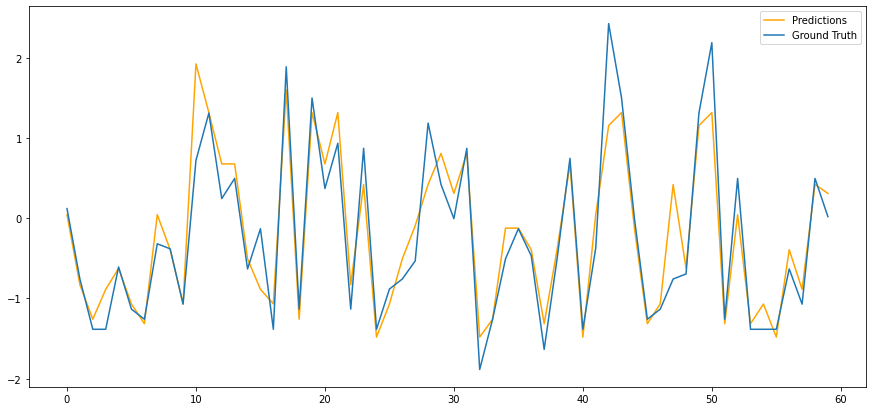

In [64]:
plt.figure(figsize=(15,7))
plt.plot(list(range(len(predicted))), predicted, color='orange', label='Predictions')
plt.plot(list(range(len(predicted))), testY.flatten(), label='Ground Truth')
plt.legend();
plt.show()

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59]

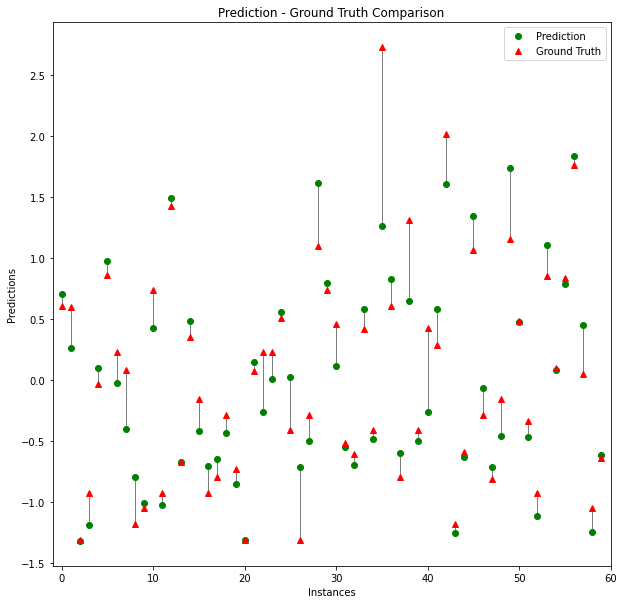

In [129]:
comparison_plot(predicted, testY.flatten())

In [51]:
regr = svm.SVR(**regr_GS.best_estimator_.get_params())
mse_cv_scores = cross_val_score(regr, trainX, trainY.ravel(), cv=10, scoring=make_scorer(mean_squared_error))
mae_cv_scores = cross_val_score(regr, trainX, trainY.ravel(), cv=10, scoring=make_scorer(mean_absolute_error))
r2_cv_scores = cross_val_score(regr, trainX, trainY.ravel(), cv=10, scoring=make_scorer(r2_score))


In [52]:
print(f' MSE CV Scores :\n {mse_cv_scores}\n Mean MSE CV Scores : {np.average(mse_cv_scores)}\n')
print(f' MAE CV Scores :\n {mae_cv_scores}\n Mean MAE CV Scores : {np.average(mae_cv_scores)}\n')
print(f' R2 CV Scores :\n {r2_cv_scores}\n Mean R2 CV Scores : {np.average(r2_cv_scores)}')

 MSE CV Scores :
 [0.10044283 0.1185145  0.19804116 0.07471731 0.07119181 0.14775312
 0.08491402 0.19847809 0.07398493 0.11066143]
 Mean MSE CV Scores : 0.11786991969050806

 MAE CV Scores :
 [0.22942851 0.26919007 0.29013705 0.23210905 0.20383414 0.25325439
 0.23967337 0.26747798 0.20375577 0.25197856]
 Mean MAE CV Scores : 0.24408388893724528

 R2 CV Scores :
 [0.91501128 0.86207611 0.81266976 0.89889199 0.92334847 0.85870426
 0.90305856 0.82588479 0.90813357 0.90276338]
 Mean R2 CV Scores : 0.8810542180002795


# TODO

2. Add line plot for comparison in test set data
3. Add Model comparison chart plot
4. Multiple CV comparison plot for each K

Explain why we chose K to be that value, why did we choose hyper parameter, Feature adding and showing the performance for each training when you add one more feature. 